In [661]:
import numpy as np
from numpy import hstack
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime



In [3]:
%load_ext google.cloud.bigquery


In [4]:
%%bigquery df_bigq
SELECT sum(b.tickets_pax) as total_pax,  date(departure_time) as departure_time 
from `distribusion-next-13.dl_analytics_v_0_2.bookings_caramelo`b
where departure_time > '2021-05-31' 
      AND departure_time < '2021-12-13' 
group by departure_time
order by departure_time


Downloading: 100%|██████████| 196/196 [00:02<00:00, 81.30rows/s]


In [5]:
%%bigquery df_bigq
SELECT sum(b.tickets_pax) as total_pax,  date(departure_time) as departure_time 
from `distribusion-next-13.dl_analytics_v_0_2.bookings_caramelo`b
where departure_time > '2021-05-31' 
      AND departure_time < '2021-12-12' 
group by departure_time
order by departure_time

Downloading: 100%|██████████| 195/195 [00:02<00:00, 84.75rows/s] 


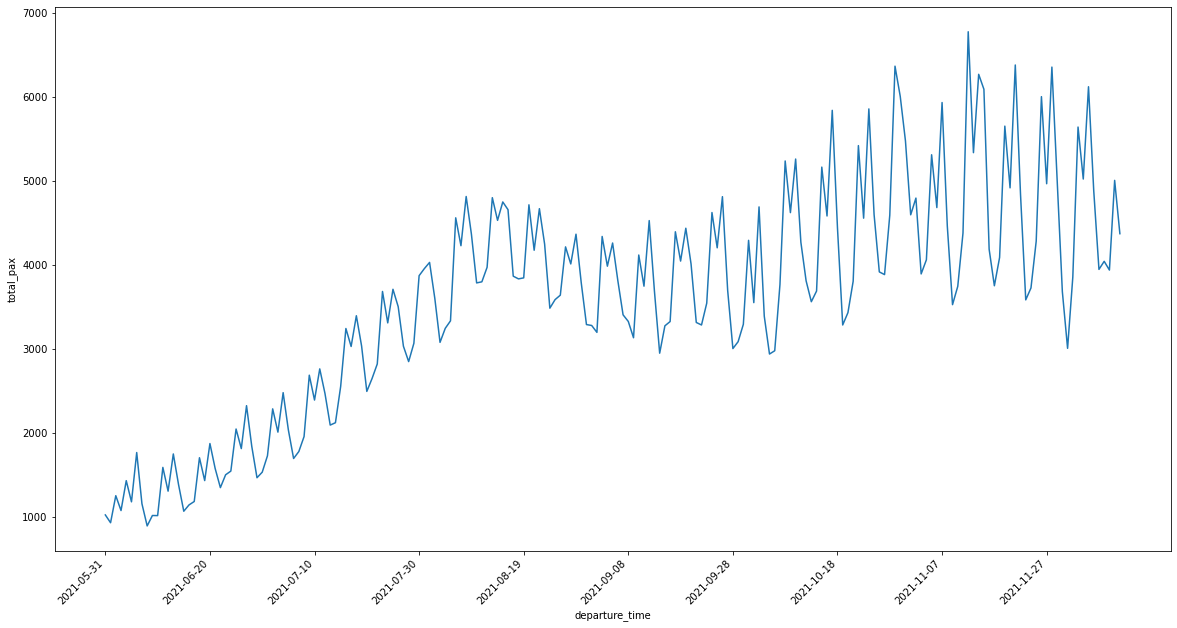

In [8]:

plt.figure(figsize=(20,10))
ax = sns.lineplot(data=df_bigq, x='departure_time', y='total_pax')
#plt.axvline("2021-12-01")


plt.xticks(
    df_bigq['departure_time'].iloc[::20], # Odd rows only
    rotation=45,
    horizontalalignment='right',
    fontweight='light')

plt.show()


In [49]:
def split_dataframe(df, chunk_size): 
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append((np.array(df[i*chunk_size:(i+1)*chunk_size])))
    return chunks

In [10]:
weekly_pax = split_dataframe(df_bigq, 7)
daily_pax = split_dataframe(df_bigq, 3)


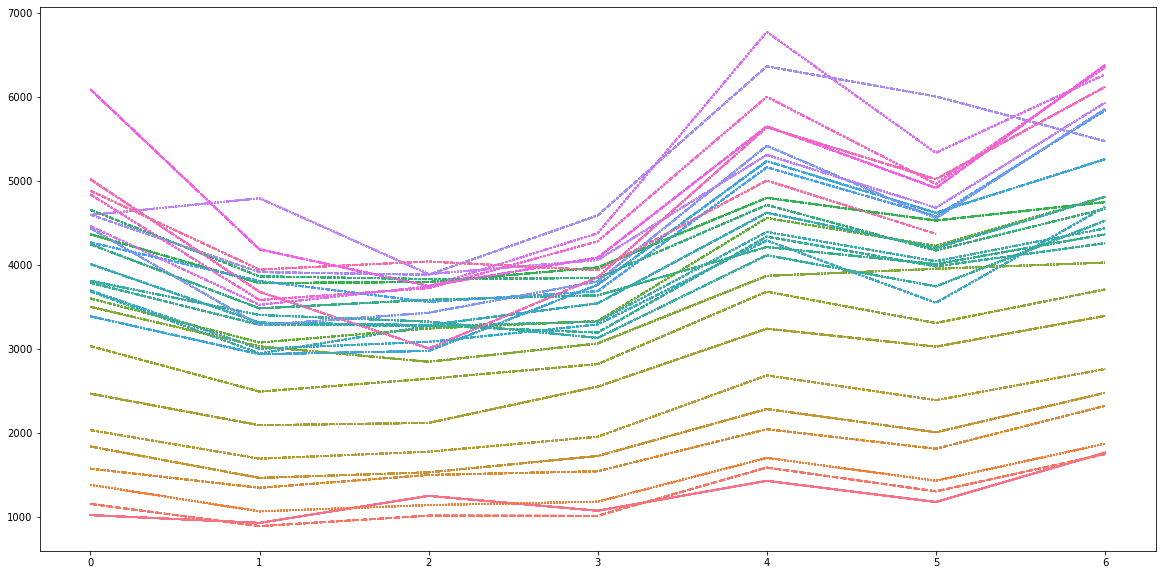

In [11]:
plt.figure(figsize=(20,10))
for week in weekly_pax:
    ax = sns.lineplot(data=weekly_pax)
    plt.legend([],[], frameon=False)


In [12]:
from sklearn.neighbors import LocalOutlierFactor

In [360]:
%%bigquery df_hour
SELECT  date(t.booked_at) as date, extract(hour from t.booked_at) as hour, sum(t.tickets_pax) as pax
FROM `distribusion-next-13.dl_analytics_v_0_2.bookings_caramelo` t
where t.retailer_name in ('Omio')
      and date(t.booked_at ) <= '2021-12-31'
      and date(t.booked_at ) >= '2021-10-04'
      #and date_diff(date(t.departure_time), date(t.booked_at), day) > 1
group by date, hour
order by date, hour

Downloading: 100%|██████████| 1950/1950 [00:02<00:00, 837.15rows/s]


In [77]:
df_hour

,date,hour,pax
0,2021-10-04,0,21
1,2021-10-04,1,8
2,2021-10-04,2,4
3,2021-10-04,3,8
4,2021-10-04,4,16
...,...,...,...
1671,2021-12-12,19,90
1672,2021-12-12,20,85
1673,2021-12-12,21,63
1674,2021-12-12,22,99


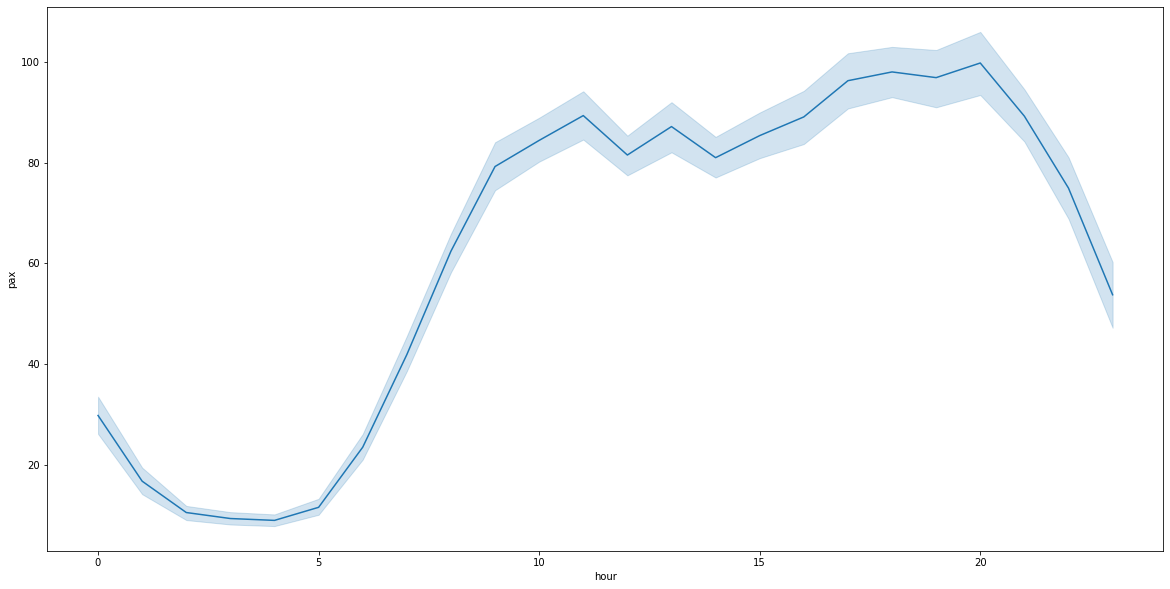

In [ ]:

plt.figure(figsize=(20,10))
ax = sns.lineplot(x='hour', y='pax', data=df_hour)
#ax = sns.lineplot(x='date', y='pax', data=df_hp)



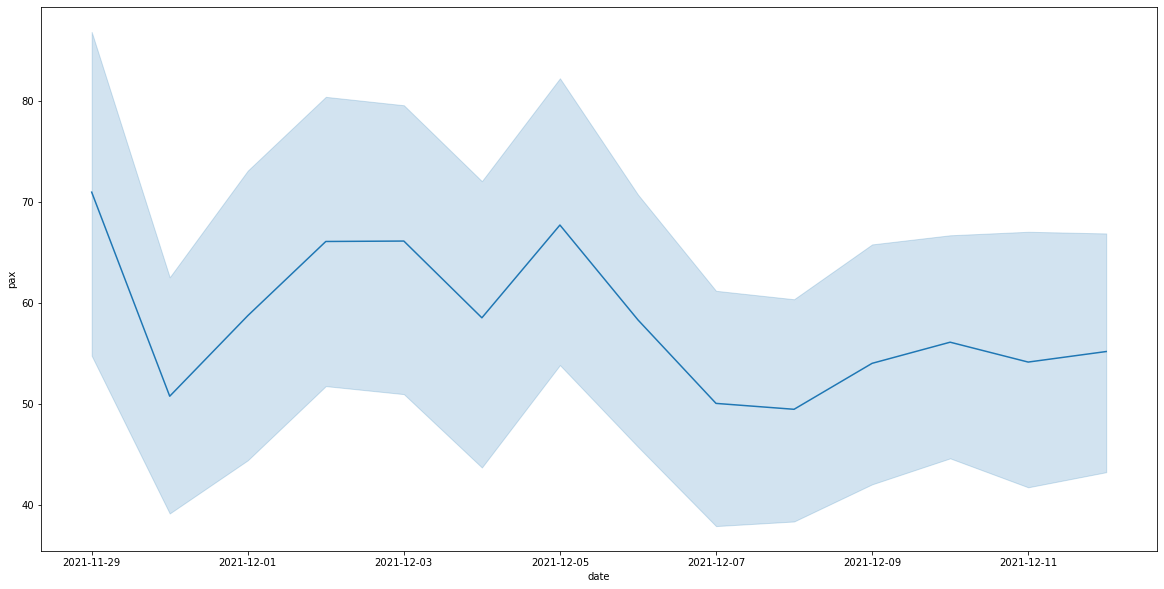

In [86]:
startdate = pd.to_datetime('2021-11-29').date()
enddate = pd.to_datetime('2021-12-12').date()
kw_51 = df_hour[(df_hp['date'] >= startdate) & (df_hour['date'] <= enddate)]
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='date', y='pax', data=kw_51)
#ax = sns.lineplot(x='date', y='pax', data=df_hp)



In [701]:
%%bigquery df_day
SELECT  date(t.booked_at) as date, sum(t.tickets_pax) as pax
FROM `distribusion-next-13.dl_analytics_v_0_2.bookings_caramelo` t
where t.retailer_name in ('Omio')
      and date(t.booked_at ) <= '2021-12-15'
      and date(t.booked_at ) >= '2021-11-15'
      #and date_diff(date(t.departure_time), date(t.booked_at), day) > 1
group by date
order by date

Downloading: 100%|██████████| 31/31 [00:21<00:00,  1.46rows/s]


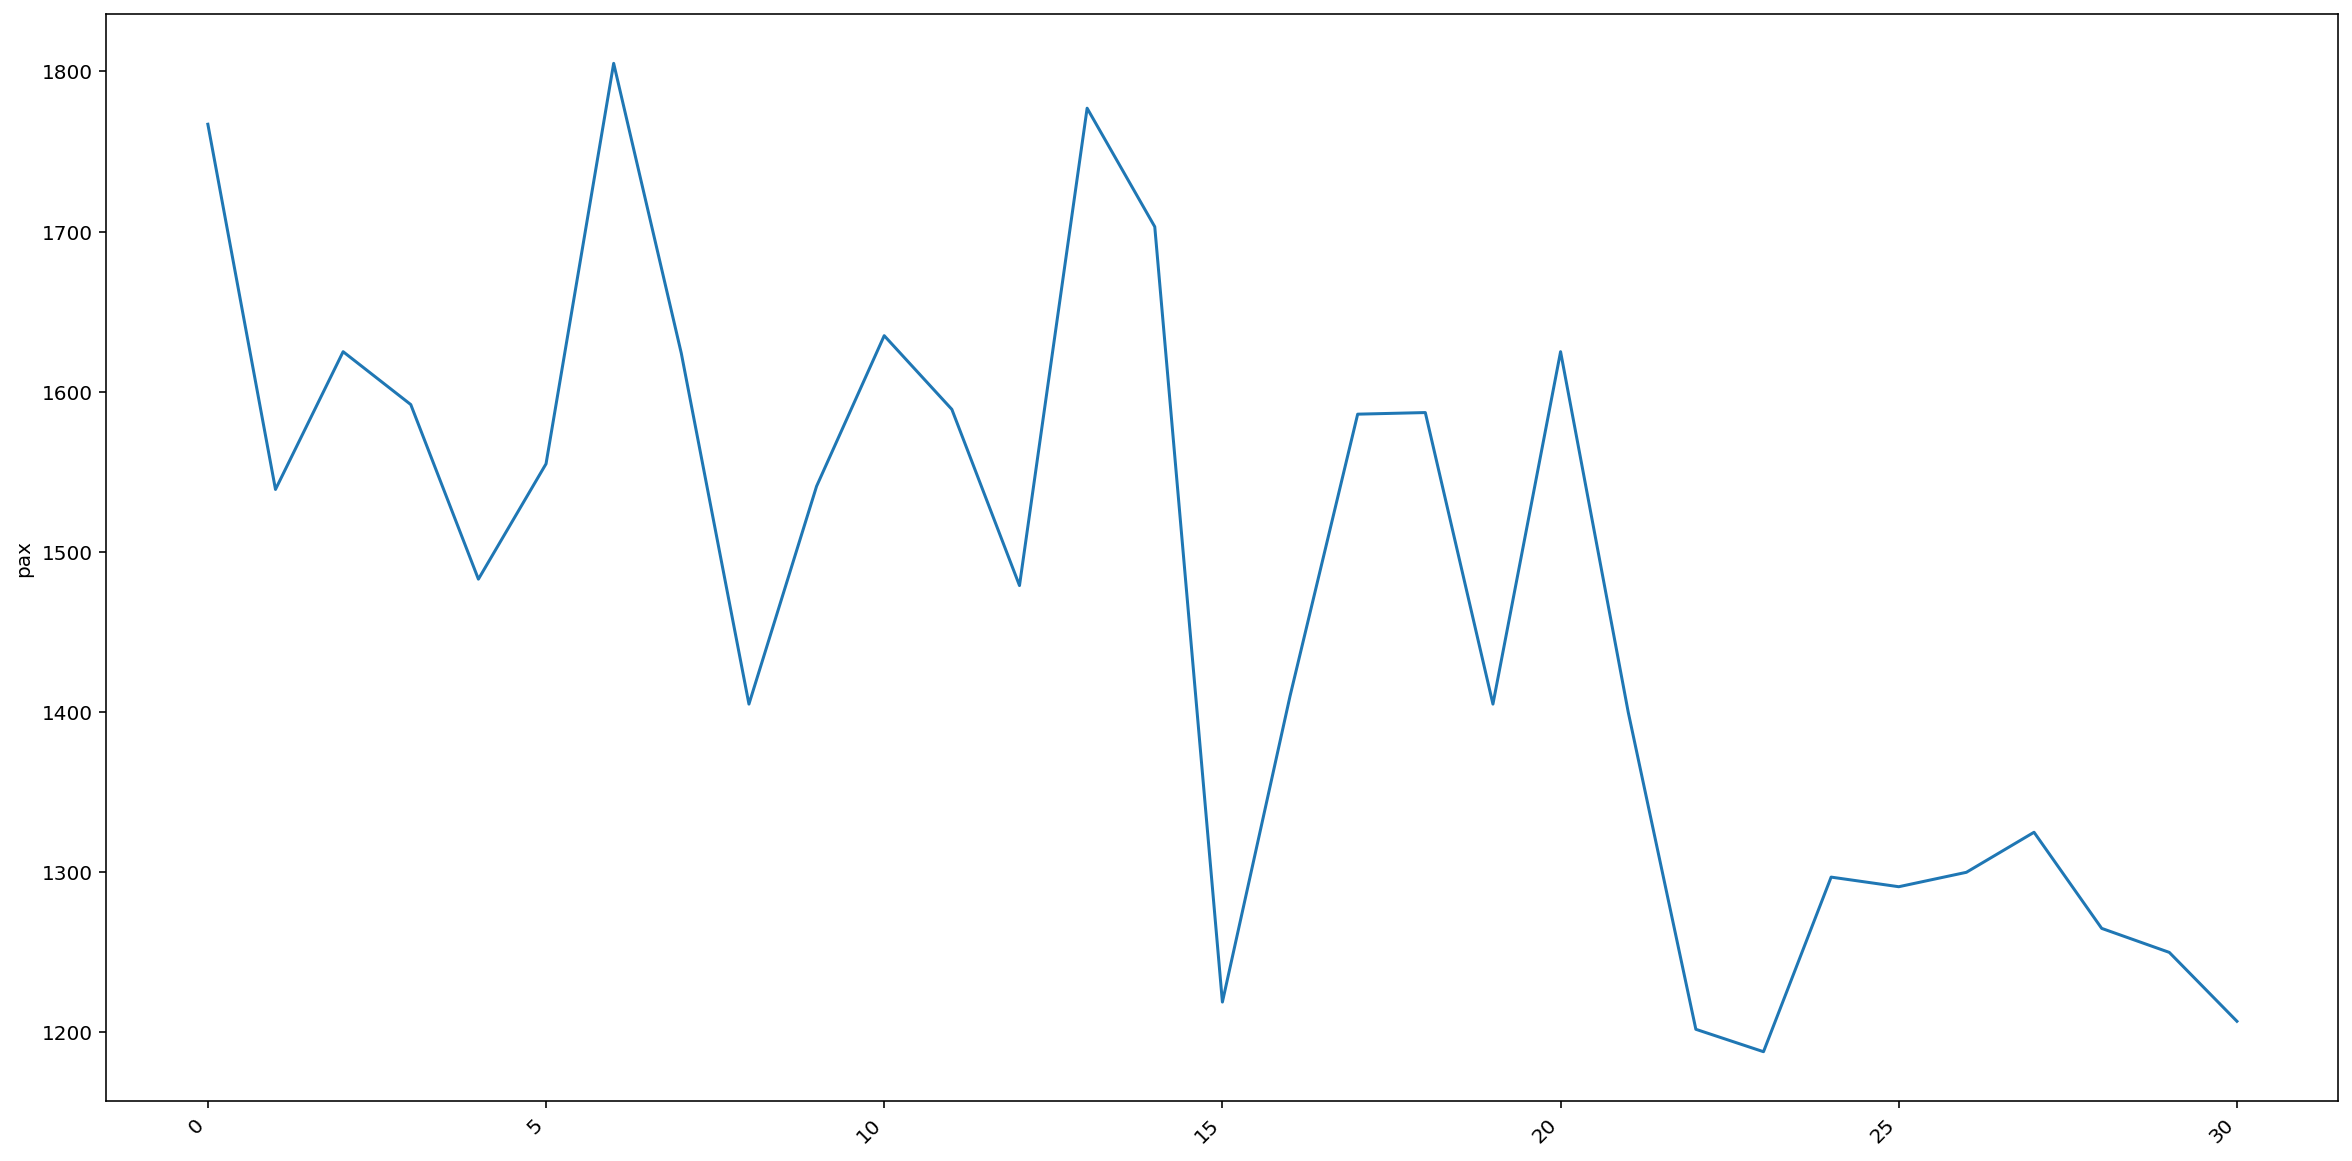

In [702]:

plt.figure(figsize=(20,10))
ax = sns.lineplot(data=df_day, x=df_day.index, y='pax')
#plt.axvline("2021-12-01")


plt.xticks(
    #df_day['date'], # Odd rows only
    rotation=45,
    horizontalalignment='right',
    fontweight='light')

plt.show()

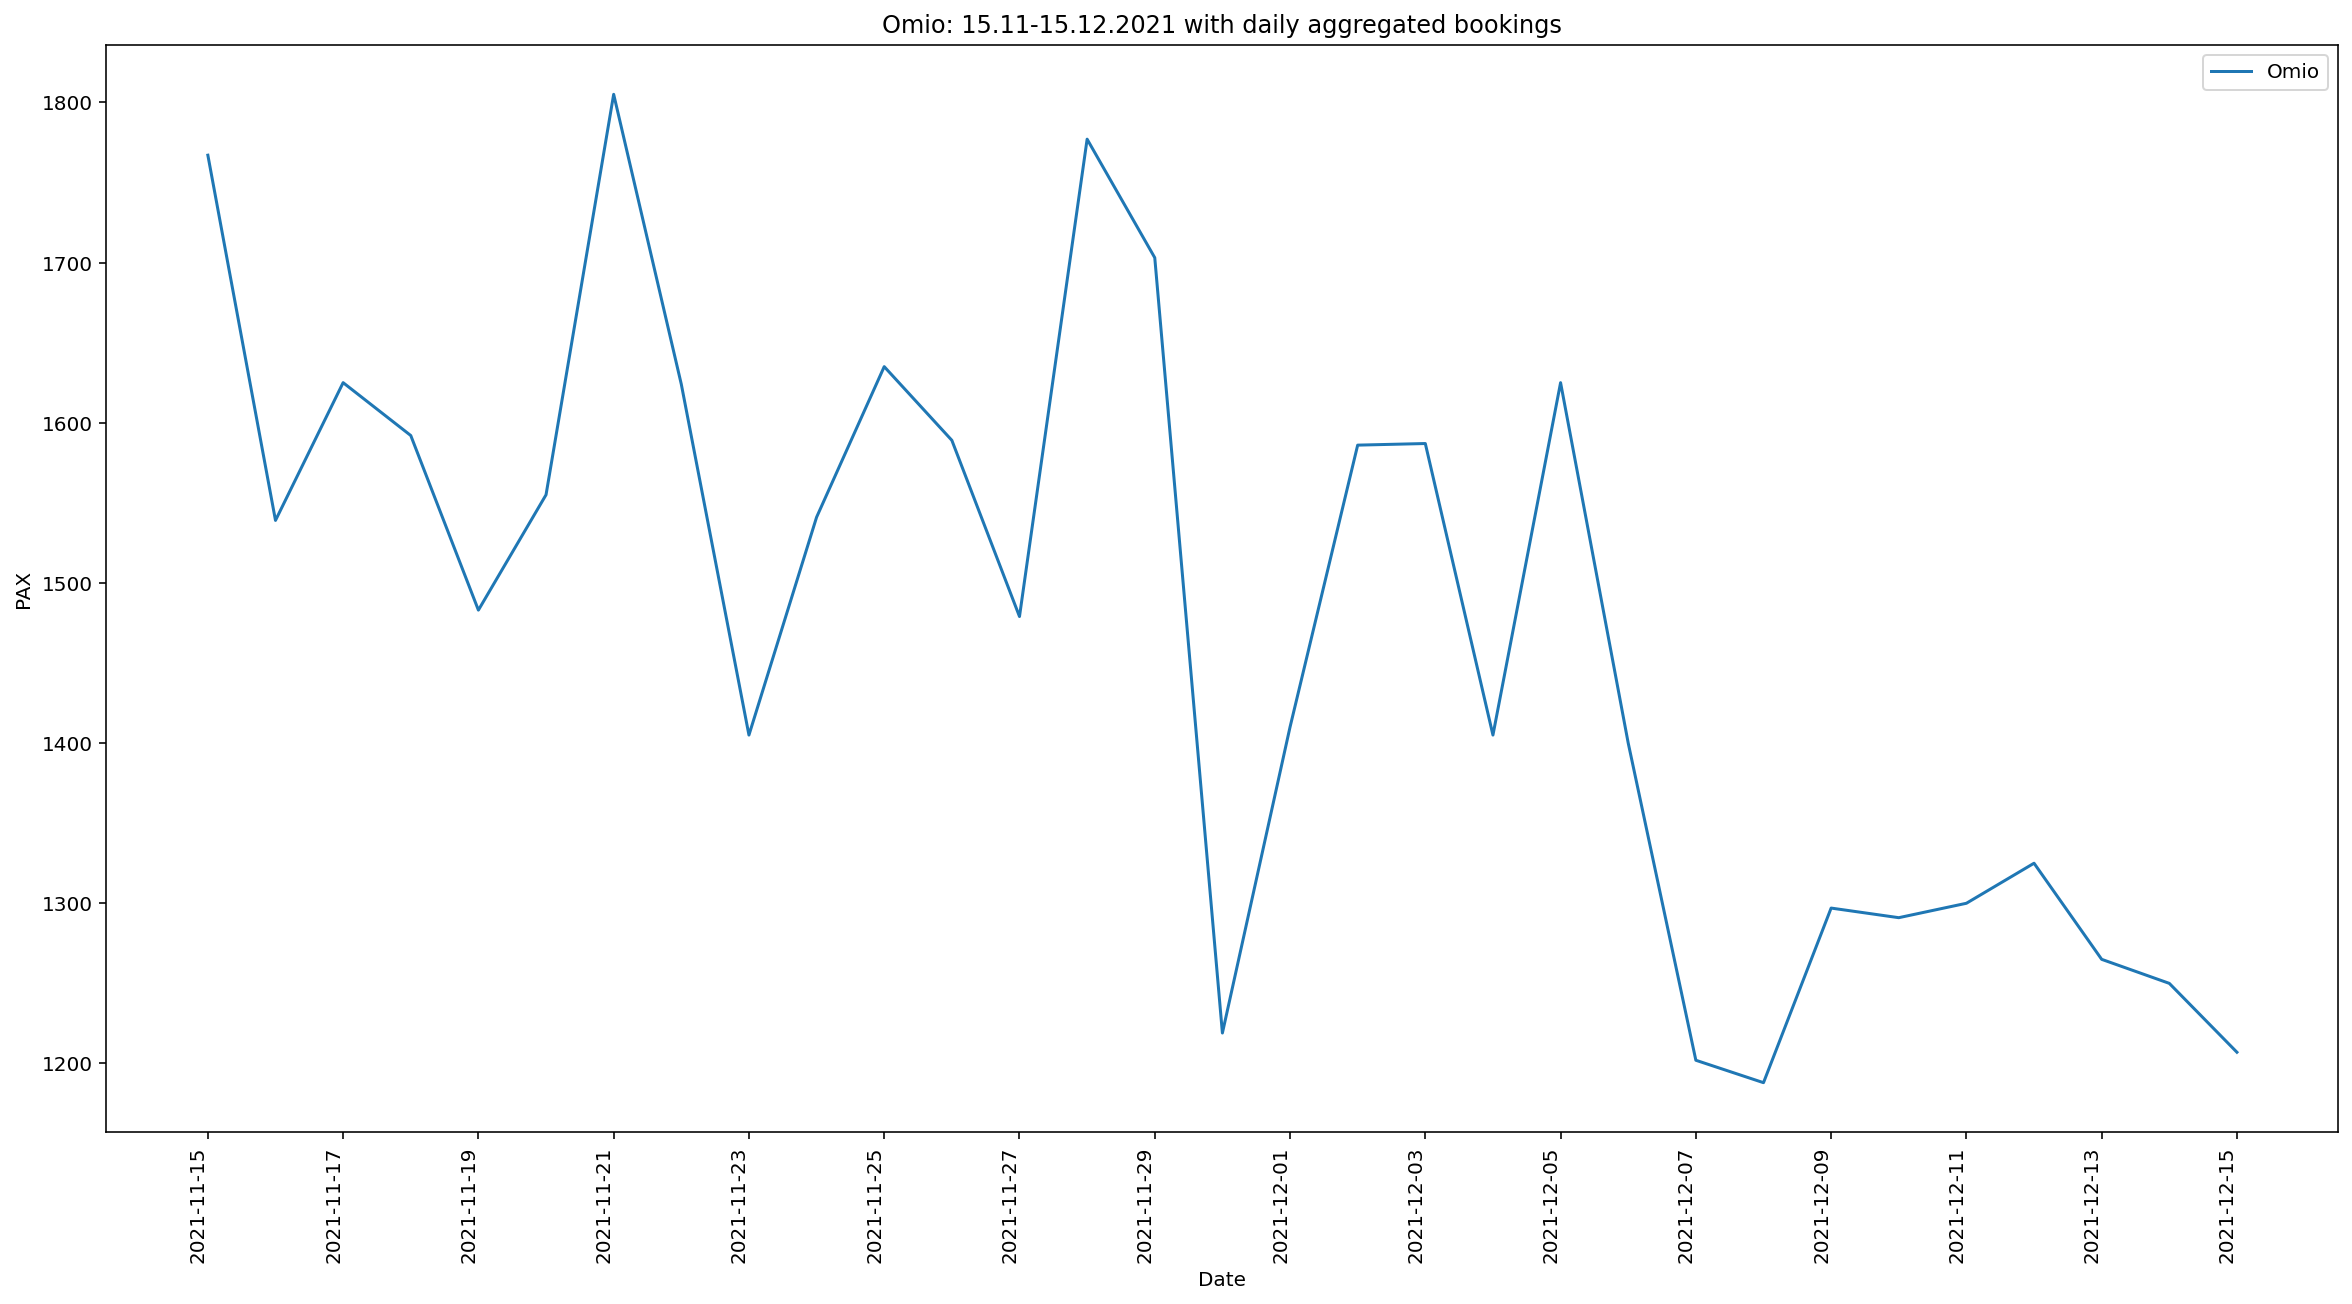

In [704]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='date', y='pax', label = 'Omio', data=df_day)



plt.xticks(
    df_day['date'].iloc[::2], # Odd rows only
    rotation=90,
    horizontalalignment='right',
    fontweight='light')


xlabel('Date')
ylabel('PAX')
title('Omio: 15.11-15.12.2021 with daily aggregated bookings')

plt.show()



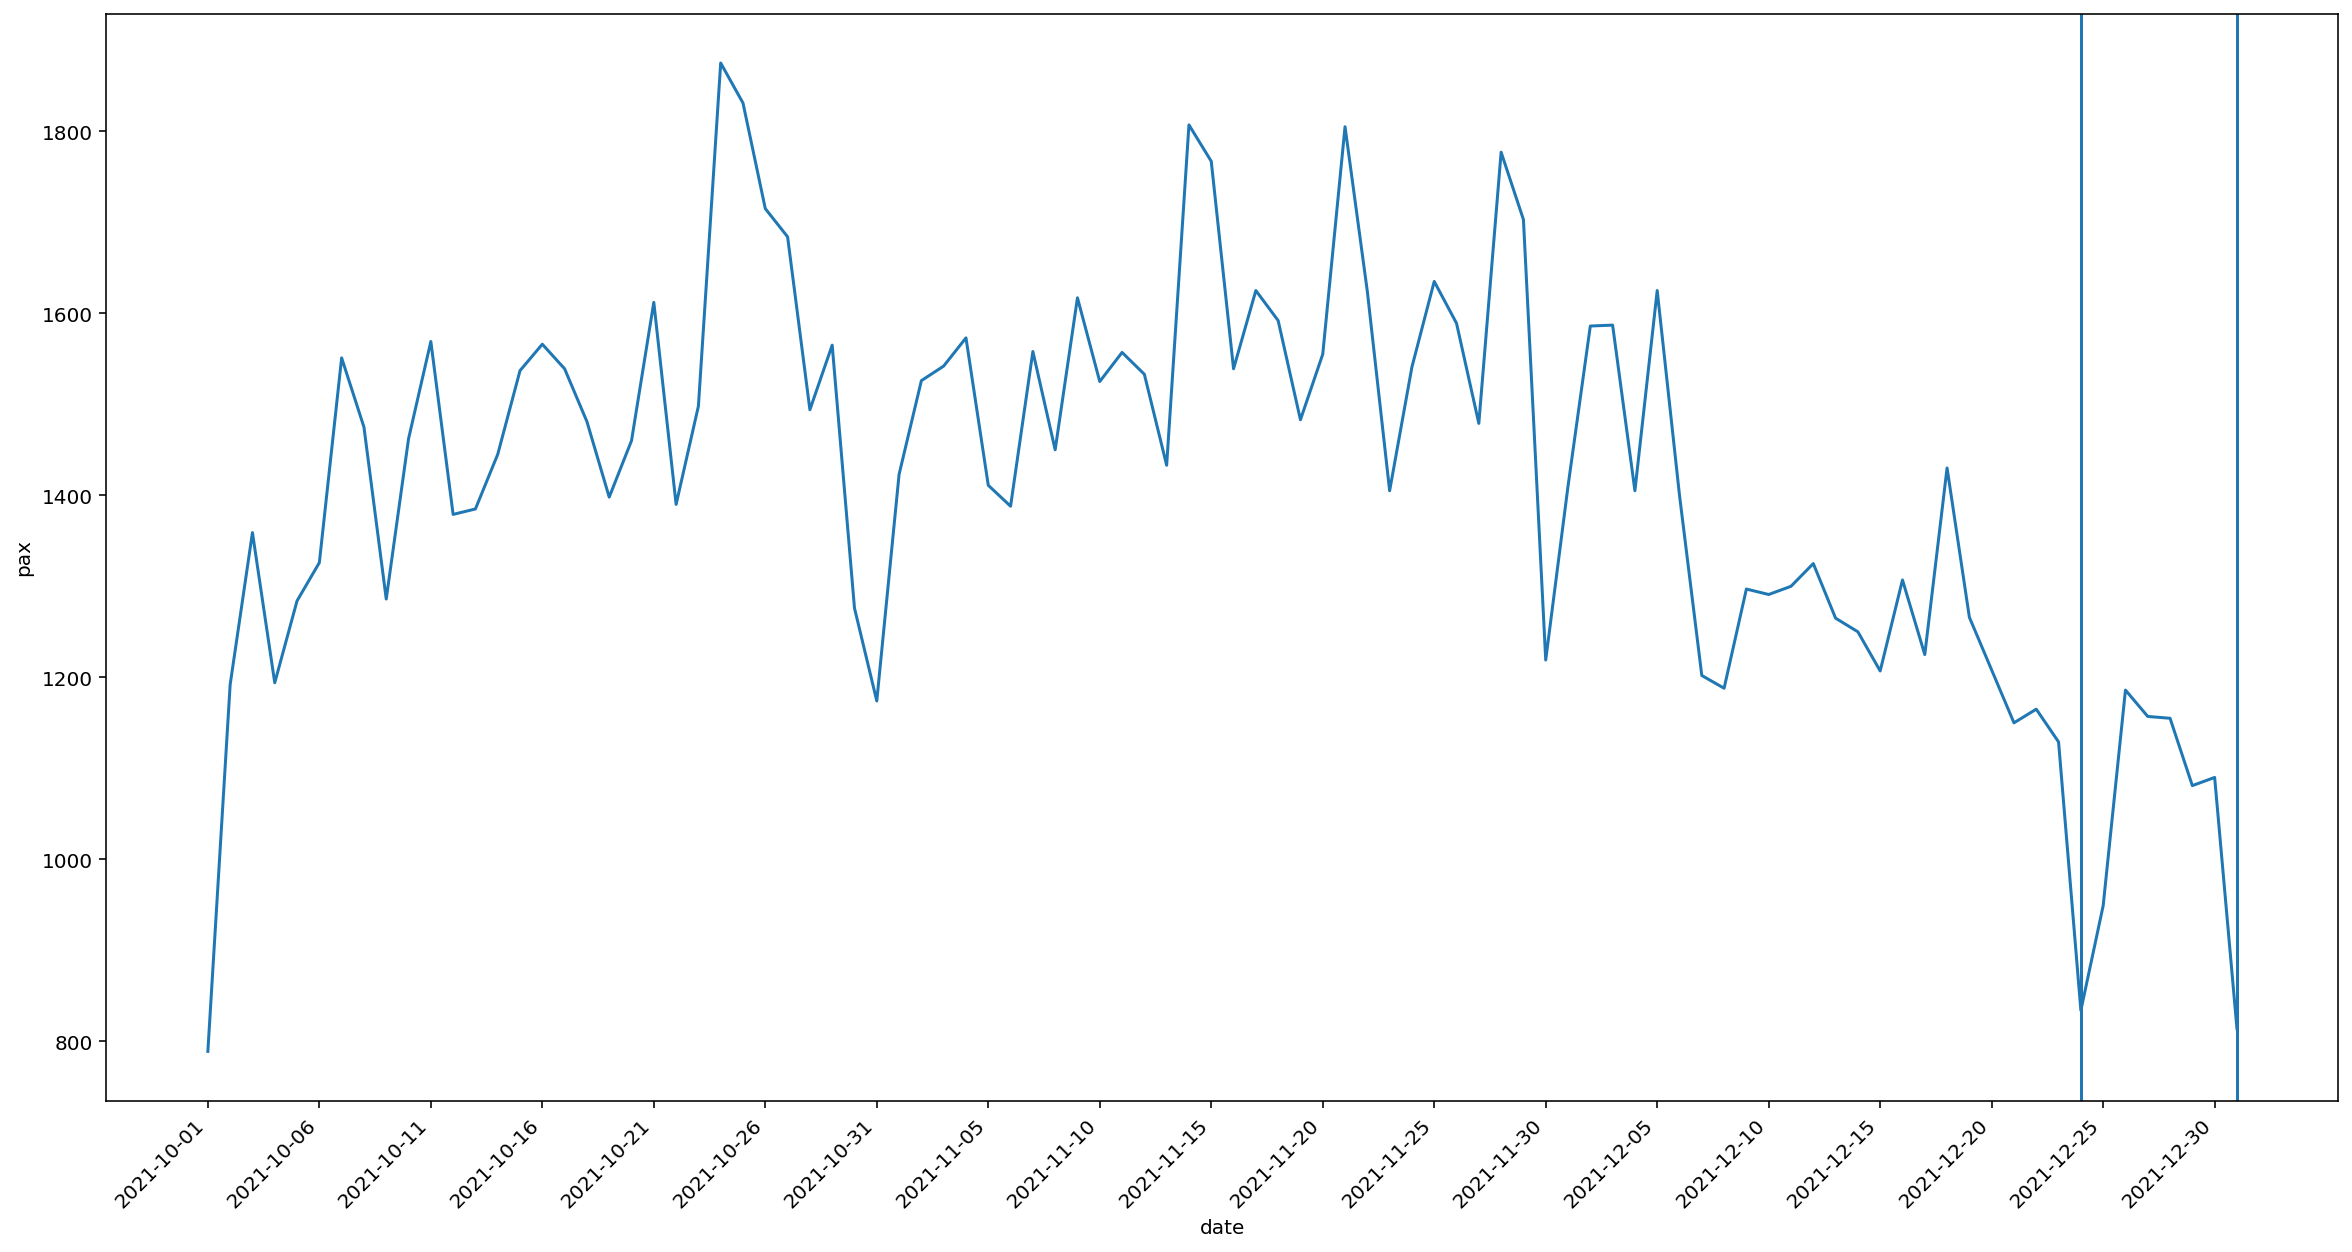

In [684]:
from datetime import datetime

plt.figure(figsize=(20,10))
ax = sns.lineplot(data=df_day, x='date', y='pax')

plt.axvline(datetime.strptime('2021-12-24', '%Y-%m-%d'))
plt.axvline(datetime.strptime('2021-12-31', '%Y-%m-%d'))


plt.xticks(
    df_day['date'].iloc[::5], # Odd rows only
    rotation=45,
    horizontalalignment='right',
    fontweight='light')

plt.show()

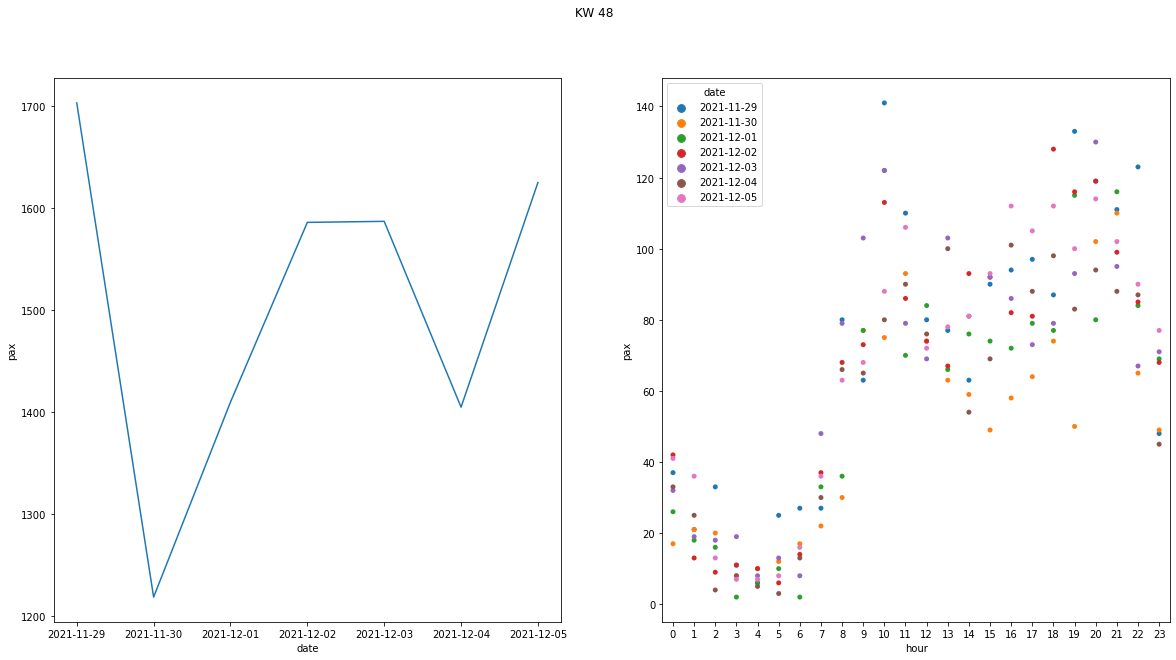

In [122]:

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,10))
fig.suptitle('KW 48')

startdate = pd.to_datetime('2021-11-29').date()
enddate = pd.to_datetime('2021-12-05').date()

kw_day = df_day[(df_day['date'] >= startdate) & (df_day['date'] <= enddate)]
kw_hour = df_hour[(df_hour['date'] >= startdate) & (df_hour['date'] <= enddate)]

sns.lineplot(x='date', y='pax', data=kw_day, ax = axes[0])
sns.stripplot(x='hour', y='pax', data=kw_hour,  jitter = False, hue='date',  ax = axes[1])

plt.show()

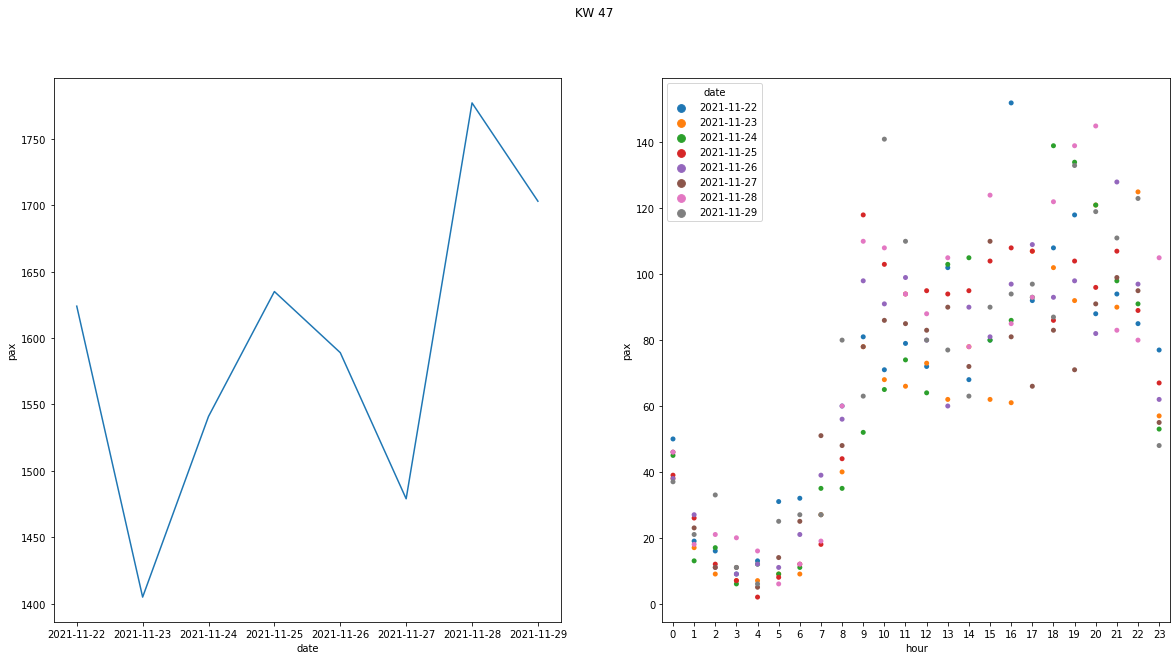

In [277]:

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,10))
fig.suptitle('KW 47')

startdate = pd.to_datetime('2021-11-22').date()
enddate = pd.to_datetime('2021-11-29').date()

kw_day = df_day[(df_day['date'] >= startdate) & (df_day['date'] <= enddate)]
kw_hour = df_hour[(df_hour['date'] >= startdate) & (df_hour['date'] <= enddate)]

sns.lineplot(x='date', y='pax', data=kw_day, ax = axes[0])
sns.stripplot(x='hour', y='pax', data=kw_hour,  jitter = False, hue='date',  ax = axes[1])

plt.show()

<Figure size 3600x2160 with 0 Axes>

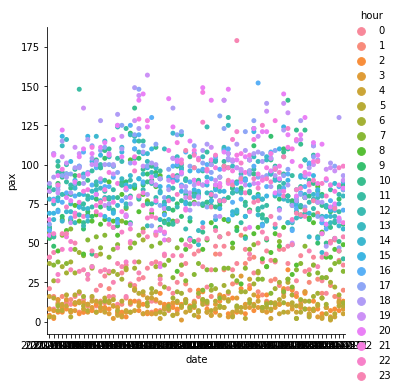

In [278]:
plt.figure(figsize=(50,30))
#ax = sns.lineplot(x='hour', y='pax', data=df_hp)
ax = sns.catplot(x='date', y='pax', jitter = False, hue='hour', data=df_hour)

In [67]:
weekly_data = split_dataframe(df_hp, 24*7)



(168, 3)

<Figure size 3600x2160 with 0 Axes>

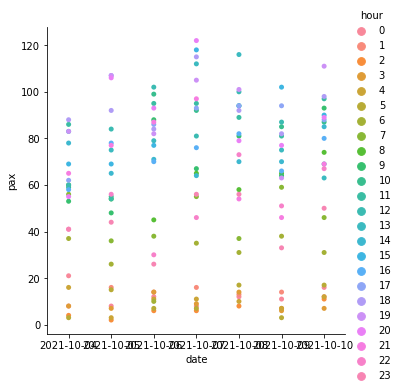

In [129]:

for week in weekly_data:
    week = pd.DataFrame(week, columns=['date','hour','pax'])
    ax = plt.figure(figsize=(50,30))
    ax = sns.catplot(x='date', y='pax', jitter = False, hue='hour', data=week)
    break

In [221]:
%%bigquery df_week
SELECT  extract(DAYOFWEEK from t.booked_at) as day, extract(hour from t.booked_at) as hour, sum(t.tickets_pax) as pax
FROM `distribusion-next-13.dl_analytics_v_0_2.bookings_caramelo` t
where t.retailer_name in ('Omio')
      and date(t.booked_at ) >= '2021-11-22'
      and date(t.booked_at ) <= '2021-11-28'
      #and date_diff(date(t.departure_time), date(t.booked_at), day) > 1
group by day, hour
order by day, hour

Downloading: 100%|██████████| 168/168 [00:01<00:00, 120.70rows/s]


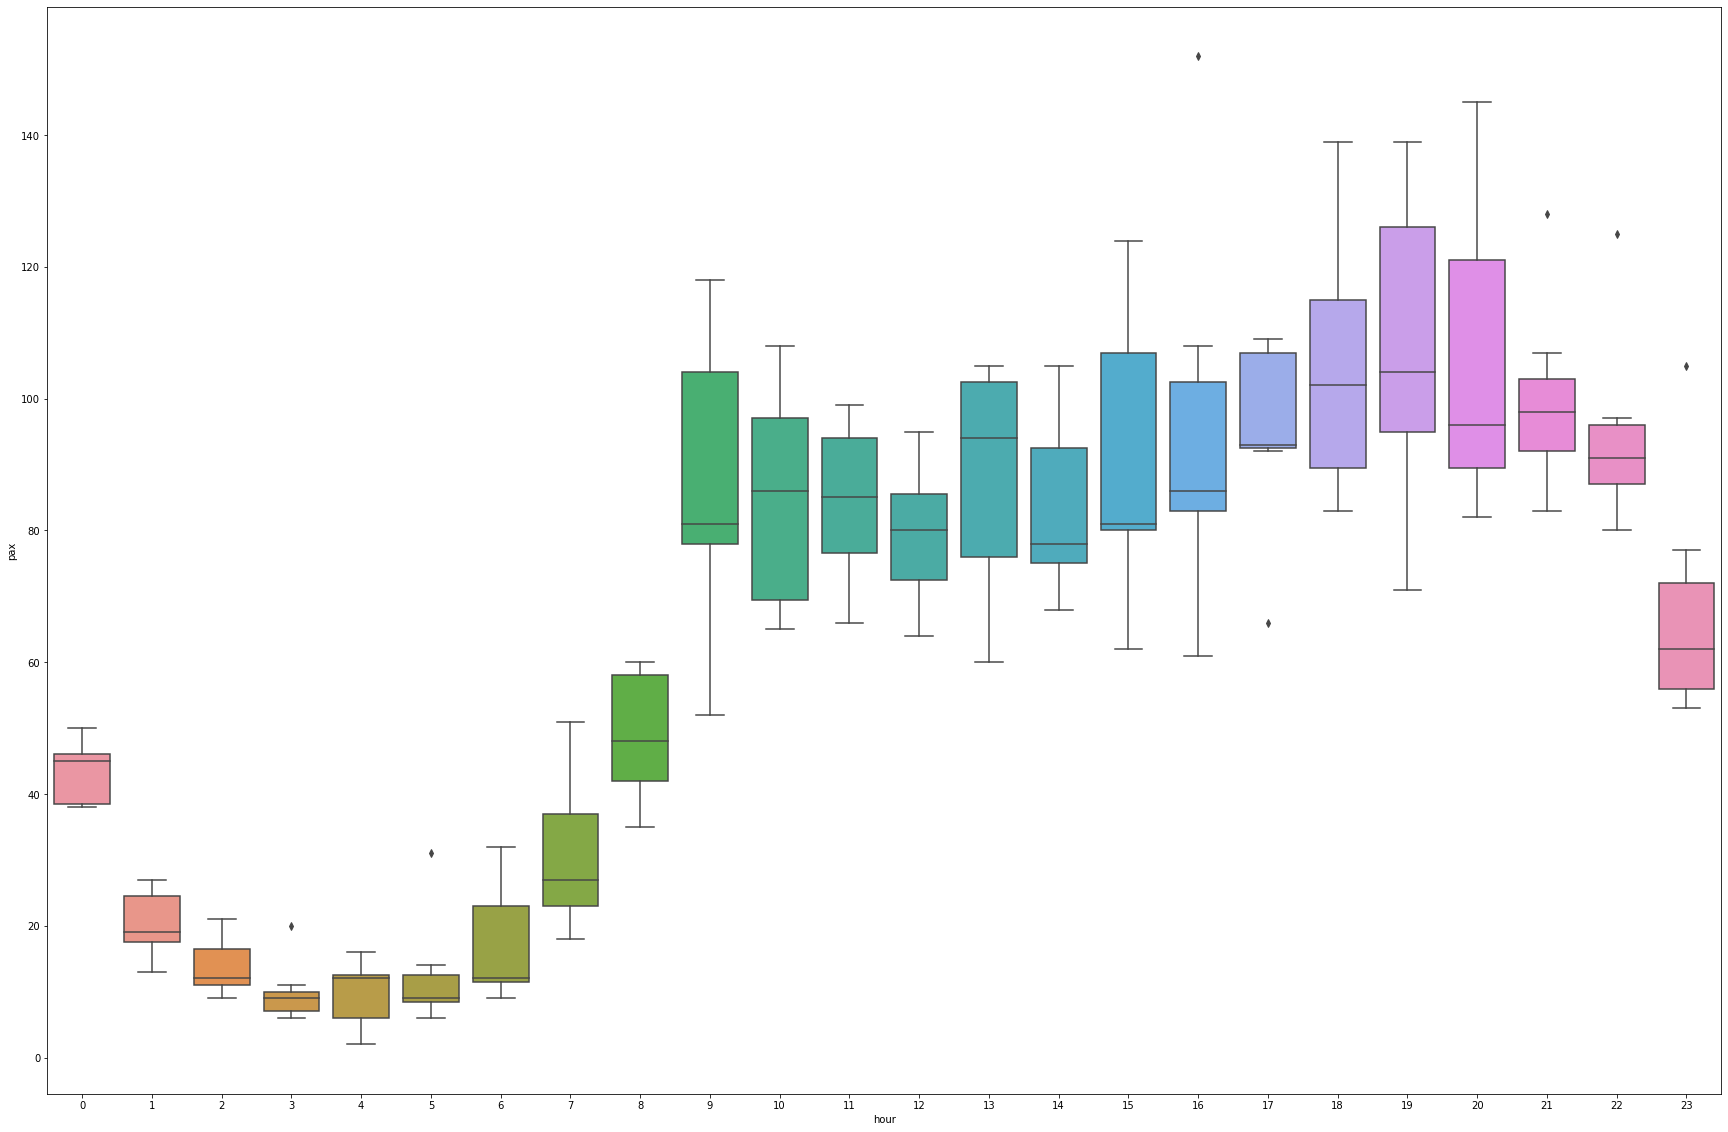

In [223]:
plt.figure(figsize=(30,20))
#ax = sns.lineplot(x='hour', y='pax', data=df_hp)
ax = sns.boxplot(x='hour', y='pax', data=df_week)

In [191]:
%%bigquery df_wndw
SELECT  date(t.booked_at) as date, extract(hour from t.booked_at) as hour, sum(t.tickets_pax) as pax
FROM `distribusion-next-13.dl_analytics_v_0_2.bookings_caramelo` t
where t.retailer_name in ('Omio')
      and date(t.booked_at ) >= '2021-11-22'
      and date(t.booked_at ) <= '2021-11-28'
      #and date_diff(date(t.departure_time), date(t.booked_at), day) > 1
group by date, hour
order by date, hour

Downloading: 100%|██████████| 168/168 [00:01<00:00, 96.88rows/s] 


In [202]:
%%bigquery df_new
SELECT  date(t.booked_at) as date, extract(hour from t.booked_at) as hour, sum(t.tickets_pax) as pax
FROM `distribusion-next-13.dl_analytics_v_0_2.bookings_caramelo` t
where t.retailer_name in ('Omio')
      and date(t.booked_at ) = '2021-11-29'
      #and date(t.booked_at ) <= '2021-12-29'
      #and date_diff(date(t.departure_time), date(t.booked_at), day) > 1
group by date, hour
order by date, hour

Downloading: 100%|██████████| 24/24 [00:01<00:00, 16.58rows/s]


In [198]:
h0 = df_wndw[(df_wndw['hour'] == 0)]
h1 = df_wndw[(df_wndw['hour'] == 1)]
h2 = df_wndw[(df_wndw['hour'] == 2)]
h3 = df_wndw[(df_wndw['hour'] == 3)]
h4 = df_wndw[(df_wndw['hour'] == 4)]
h5 = df_wndw[(df_wndw['hour'] == 5)]
h6 = df_wndw[(df_wndw['hour'] == 6)]
h7 = df_wndw[(df_wndw['hour'] == 7)]
h8 = df_wndw[(df_wndw['hour'] == 8)]
h9 = df_wndw[(df_wndw['hour'] == 9)]
h10 = df_wndw[(df_wndw['hour'] == 10)]
h11 = df_wndw[(df_wndw['hour'] == 11)]
h12 = df_wndw[(df_wndw['hour'] == 12)]
h13 = df_wndw[(df_wndw['hour'] == 13)]
h14 = df_wndw[(df_wndw['hour'] == 14)]
h15 = df_wndw[(df_wndw['hour'] == 15)]
h16 = df_wndw[(df_wndw['hour'] == 16)]
h17 = df_wndw[(df_wndw['hour'] == 17)]
h18 = df_wndw[(df_wndw['hour'] == 18)]
h19 = df_wndw[(df_wndw['hour'] == 19)]
h20 = df_wndw[(df_wndw['hour'] == 20)]
h21 = df_wndw[(df_wndw['hour'] == 21)]
h22 = df_wndw[(df_wndw['hour'] == 22)]
h23 = df_wndw[(df_wndw['hour'] == 23)]


In [227]:
test = df_new['pax'].to_list()

In [216]:
df_wndw

,date,hour,pax
0,2021-11-22,0,50
1,2021-11-22,1,19
2,2021-11-22,2,16
3,2021-11-22,3,9
4,2021-11-22,4,13
...,...,...,...
163,2021-11-28,19,139
164,2021-11-28,20,145
165,2021-11-28,21,83
166,2021-11-28,22,80


In [252]:
df_new 

,date,hour,pax
0,2021-11-29,0,37
1,2021-11-29,1,21
2,2021-11-29,2,33
3,2021-11-29,3,11
4,2021-11-29,4,6
5,2021-11-29,5,25
6,2021-11-29,6,27
7,2021-11-29,7,27
8,2021-11-29,8,80
9,2021-11-29,9,63


In [209]:
data = h0['pax']
new_dp = n0['pax']
data , new_dp

(0      50
 24     38
 48     45
 72     39
 96     38
 120    46
 144    46
 Name: pax, dtype: int64,
 0    37
 Name: pax, dtype: int64)

In [210]:
mean = np.mean(data)
std = np.std(data)
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 43.142857142857146
std. deviation is 4.421653583012047


In [212]:
threshold = 0.1
outlier = []
for i in new_dp:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is []


In [ ]:

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,10))
fig.suptitle('01.11-21.11.2021')

startdate = pd.to_datetime('2021-11-01').date()
enddate = pd.to_datetime('2021-12-21').date()

kw_day = df_day[(df_day['date'] >= startdate) & (df_day['date'] <= enddate)]
kw_hour = df_hour[(df_hour['date'] >= startdate) & (df_hour['date'] <= enddate)]

sns.lineplot(x='date', y='pax', data=kw_day, ax = axes[0])
sns.stripplot(x='hour', y='pax', data=kw_hour,  jitter = False, hue='date',  ax = axes[1])

# Z-Score - Configuration 1

In [502]:
%%bigquery df_wndw
SELECT  date(t.booked_at) as date, extract(hour from t.booked_at) as hour, sum(t.tickets_pax) as pax
FROM `distribusion-next-13.dl_analytics_v_0_2.bookings_caramelo` t
where t.retailer_name in ('Omio')
      and date(t.booked_at ) >= '2021-11-22'
      and date(t.booked_at ) <= '2021-11-28'
      #and date_diff(date(t.departure_time), date(t.booked_at), day) > 1
group by date, hour
order by date, hour

Downloading: 100%|██████████| 168/168 [00:01<00:00, 98.30rows/s] 


In [503]:
%%bigquery df_new
SELECT  date(t.booked_at) as date, extract(hour from t.booked_at) as hour, sum(t.tickets_pax) as pax
FROM `distribusion-next-13.dl_analytics_v_0_2.bookings_caramelo` t
where t.retailer_name in ('Omio')
      and date(t.booked_at ) = '2021-11-29'
      #and date(t.booked_at ) <= '2021-12-29'
      #and date_diff(date(t.departure_time), date(t.booked_at), day) > 1
group by date, hour
order by date, hour

Downloading: 100%|██████████| 24/24 [00:01<00:00, 21.97rows/s]


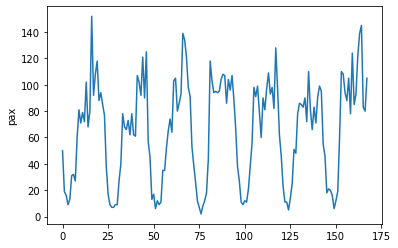

In [504]:
#df_wndw['pax'].plot()
ax = sns.lineplot(x=df_wndw.index, y='pax', data=df_wndw )


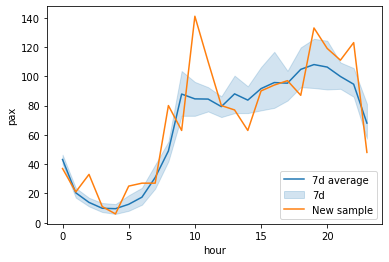

In [505]:
ax = sns.lineplot(x='hour', y='pax', data=df_wndw)
ax = sns.lineplot(x='hour', y='pax', data=df_new )

plt.legend(loc='lower right', labels=['7d average', '7d', 'New sample'])


In [506]:
data = []
hour = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
for h in hour:
    sample = df_wndw[(df_wndw['hour'] == h)]['pax'].to_numpy()
    data.append(sample)
    

In [507]:
mean = []
std = []

for sample in data:
    m = np.mean(sample)
    s = np.std(sample)
    
    mean.append(m)
    std.append(s)
    

In [508]:
mean = np.array(mean)
std = np.array(std)


In [509]:
threshold = 3
outlier = []
for h in hour:
    z = np.absolute((df_new['pax'][h]-mean[h])/std[h])
    print(z)
    if z > threshold:
        outlier.append(h)

1.3892669399651632
0.12115650656307685
4.854307825214863
0.25846826790049526
0.7722525790190192
1.578949968793365
1.1888705136543576
0.35532468065178224
3.365251227607803
1.194980540676307
3.544918408175082
2.2888603325618506
0.07337090886046803
0.619078281441076
1.6758806665599106
0.07857543762460205
0.06445653670545982
0.12383643752460677
0.9465924656563117
1.121564462263862
0.5950814733654335
0.8295994781324579
2.1025558819882133
1.1826247919781652


In [510]:
outlier


[2, 8, 10]

# Z-Score - Configuration 2

In [465]:
%%bigquery df_z2
SELECT  date(t.booked_at) as date, extract(hour from t.booked_at) as hour, sum(t.tickets_pax) as pax
FROM `distribusion-next-13.dl_analytics_v_0_2.bookings_caramelo` t
where t.retailer_name in ('Omio')
      and (date(t.booked_at ) = '2021-11-01'
      or date(t.booked_at ) = '2021-11-08'
      or date(t.booked_at ) = '2021-11-15'
      or date(t.booked_at ) = '2021-10-22')
      #and date_diff(date(t.departure_time), date(t.booked_at), day) > 1
group by date, hour
order by date, hour

Downloading: 100%|██████████| 96/96 [00:01<00:00, 54.45rows/s]


In [460]:
%%bigquery df_new_z2
SELECT  date(t.booked_at) as date, extract(hour from t.booked_at) as hour, sum(t.tickets_pax) as pax
FROM `distribusion-next-13.dl_analytics_v_0_2.bookings_caramelo` t
where t.retailer_name in ('Omio')
      and date(t.booked_at ) = '2021-11-29'
      #and date(t.booked_at ) <= '2021-12-29'
      #and date_diff(date(t.departure_time), date(t.booked_at), day) > 1
group by date, hour
order by date, hour

Downloading: 100%|██████████| 24/24 [00:02<00:00,  9.94rows/s]


In [466]:
df_z2[24:49]

,date,hour,pax
24,2021-11-01,0,21
25,2021-11-01,1,7
26,2021-11-01,2,11
27,2021-11-01,3,9
28,2021-11-01,4,8
29,2021-11-01,5,8
30,2021-11-01,6,10
31,2021-11-01,7,39
32,2021-11-01,8,52
33,2021-11-01,9,62


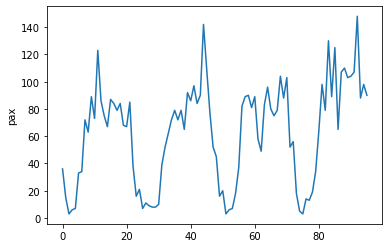

In [467]:
#df_wndw['pax'].plot()
#ax = sns.lineplot(x='hour', y='pax', hue = 'date', data=df_z2 )
ax = sns.lineplot(x=df_z2.index, y='pax', data=df_z2 )



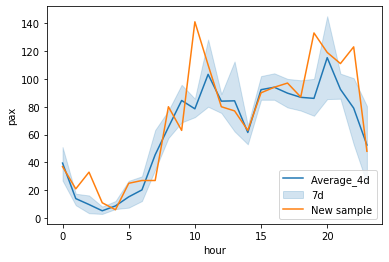

In [458]:
ax = sns.lineplot(x='hour', y='pax', data=df_z2)
ax = sns.lineplot(x='hour', y='pax', data=df_new_z2)

plt.legend(loc='lower right', labels=['Average_4d ', '7d', 'New sample'])


In [511]:
data = []
hour = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
for h in hour:
    sample = df_z2[(df_z2['hour'] == h)]['pax'].to_numpy()
    data.append(sample)
    

In [424]:
data

[array([27, 21, 45, 56]),
 array([13,  7, 16, 18]),
 array([ 7, 11, 20,  5]),
 array([12,  9,  3,  3]),
 array([10,  8,  6, 14]),
 array([18,  8,  7, 13]),
 array([38, 10, 18, 19]),
 array([55, 39, 37, 34]),
 array([70, 52, 82, 64]),
 array([104,  62,  89,  98]),
 array([78, 72, 90, 79]),
 array([115,  79,  81, 130]),
 array([108,  72,  89,  89]),
 array([ 91,  79,  58, 125]),
 array([79, 65, 49, 65]),
 array([ 91,  92,  83, 107]),
 array([119,  86,  96, 110]),
 array([148,  97,  80, 103]),
 array([123,  84,  75, 104]),
 array([144,  90,  79, 107]),
 array([141, 142, 104, 148]),
 array([129, 109,  88,  88]),
 array([ 80,  77, 103,  98]),
 array([31, 52, 52, 90])]

In [512]:
mean = []
std = []

for sample in data:
    m = np.mean(sample)
    s = np.std(sample)
    
    mean.append(m)
    std.append(s)

In [470]:
mean = np.array(mean)
std = np.array(std)


In [471]:
threshold = 3
outlier = []
for h in hour:
    z = np.absolute((df_new_z2['pax'][h]-mean[h])/std[h])
    print(z)
    if z > threshold:
        outlier.append(h)

0.19506857866021762
1.6733200530681511
3.517583056295887
2.311586975096188
0.8835412617927487
0.9288347410476049
0.7784504078016042
1.2010708253482116
1.3713515516949089
1.5925925925925926
8.730378697119727
0.28855970740931325
0.5685352436149612
0.2921849473319352
0.20652851724645427
0.24743582965269675
0.0
0.6922443782381185
0.023550608702786628
3.2627876321529294
0.11514300045290118
1.9261430632928083
1.7185664471019155
0.17196754578045376


In [472]:
outlier

[2, 10, 19]

# Descriptive Stats - Configuration 1

In [513]:
df_new['pax']

0      37
1      21
2      33
3      11
4       6
5      25
6      27
7      27
8      80
9      63
10    141
11    110
12     80
13     77
14     63
15     90
16     94
17     97
18     87
19    133
20    119
21    111
22    123
23     48
Name: pax, dtype: int64

In [514]:
df_wndw['pax'][:24]

0      50
1      19
2      16
3       9
4      13
5      31
6      32
7      27
8      60
9      81
10     71
11     79
12     72
13    102
14     68
15     80
16    152
17     92
18    108
19    118
20     88
21     94
22     85
23     77
Name: pax, dtype: int64

In [516]:
threshold = 0.4
outlier = []
for h in hour:
    z = np.absolute((df_new['pax'][h]-df_wndw['pax'][h])/df_wndw['pax'][h])
    if z > threshold:
        outlier.append(h)

In [517]:
outlier

[2, 4, 10, 22]

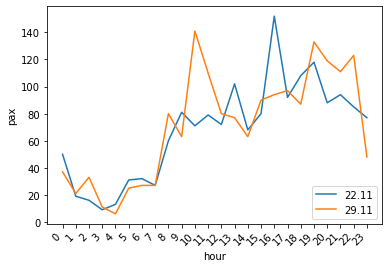

In [518]:
ax = sns.lineplot(x='hour', y='pax', data=df_wndw[:24])
ax = sns.lineplot(x='hour', y='pax', data=df_new )

plt.legend(loc='lower right', labels=['22.11', '29.11'])
plt.xticks(
    df_new['hour'].iloc[::1], # Odd rows only
    rotation=45,
    horizontalalignment='right',
    fontweight='light')

plt.show()


In [519]:
out, s = list(), list()

for o in outlier:
    out = df_new['pax'][o-1]
    s = df_wndw['pax'][h-1]
    print(out)
    print(s)
    print('---')


21
85
---
11
85
---
63
85
---
111
85
---


# CI

In [570]:
import math
import pandas as pd
import scipy.stats as stats
import numpy as np

sample = np.array([7,8,6,14]) # example bookings for previous 4 week h(i) [element of (0h-23h)] on weekday(j) [element of (mo-so)] 
mu = np.array([6]) # new sample 

#stats.poisson.ppf([0.025, 0.975], mu)
stats.poisson.interval(0.95, mu)

stats.poisson.pmf(0.95, mu)



#ns_mean = ns.mean() 
#ns_size = 1 

#sigma = ns_mean/math.sqrt(ns_size)
#print(sigma)
    
#rate_min = sample_mean - sigma
#rate_max = sample_mean + sigma

#print(rate_min, rate_max)

array([ 2., 11.])

In [588]:
def est_poission_rate_ci(n_events, source_duration, target_duration=1.0, ci=0.98):
    """
    Estimate poission rate parameter confidence interval

    Parameters
    ----------
    n_events : int
        number of observed events
    source_duration : float
        duration for which n_events were observed
    target_duration : float
        duration for which to return expected rate
    ci : float
        size of confidence interval

    Returns
    -------
    (float,float)
        Confidence interval left, right bounds
    """

    rate_estimate = n_events/source_duration 
    mu = n_events 
    pr_ci = stats.poisson.interval(0.95, mu)

    # point estimate +/- [Quantile  * SE]
    # SE = mean / sqrt N 
    # mean = 6 
    # exp: 12 bookings in 2h = 6 --> SE = 6 / 12 
    

    return pr_ci


In [610]:
from scipy import stats

def ci_sample_mean(sample):
    
    d = stats.norm(*stats.norm.fit(sample))

    sample = np.array(sample)
    sample_mean = sample.mean()
    sample_stdev = sample.std()
    sample_size = len(sample)

    mean_std = sample_stdev/math.sqrt(sample_size)

    d2 = stats.norm(sample_mean, mean_std).interval(0.95)

    return d2

    # What is the difference between ci of population and ci for mean of pop



In [612]:
sample_mean([7,8,6,14])

(5.699830647100298, 11.800169352899701)

In [602]:

sample = np.array([7,8,6,14])
sample_mean = sample.mean()
sample_stdev = sample.std()


sigma = sample_stdev/math.sqrt(sample_size)

In [590]:
import math
import pandas as pd
import scipy.stats as stats
import numpy as np

sample = np.array([7,8,6,14]) # example bookings for previous 4 week h(i) [element of (0h-23h)] on weekday(j) [element of (mo-so)] 
ns = np.array([6]) # new sample 

sample_size = 4 
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.98, df = 3) 

sample_stdev = sample.std()
sigma = sample_stdev/math.sqrt(sample_size)

margin_of_error = t_critical * sigma
    
rate_min = sample_mean - margin_of_error
rate_max = sample_mean + margin_of_error

print(rate_min, rate_max)

3.331323190576698 14.168676809423303


In [589]:
est_poission_rate_ci(6,1)

(2.0, 11.0)

In [587]:
pr = stats.poisson.interval(0.95, mu)
print(pr)

(array([2.]), array([11.]))


In [564]:
from scipy.stats import chi2

def poisson_interval(k, alpha=0.05): 
    """
    uses chisquared info to get the poisson interval. Uses scipy.stats 
    (imports in function). 
    """
    a = alpha
    low, high = (chi2.ppf(a/2, 2*k) / 2, chi2.ppf(1-a/2, 2*k + 2) / 2)
    if k == 0: 
        low = 0.0
    return low, high

In [566]:
poisson_interval(6)

(2.2018942534908508, 13.059474022518685)

In [559]:
import math
import pandas as pd
import scipy.stats as stats
import numpy as np

sample = np.array([7,8,6,14]) # example bookings for previous 4 week h(i) [element of (0h-23h)] on weekday(j) [element of (mo-so)] 
ns = np.array([6]) # new sample 

sample_size = 4 
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.98, df = 3) 

sample_stdev = sample.std()
sigma = sample_stdev/math.sqrt(sample_size)

margin_of_error = t_critical * sigma
    
rate_min = sample_mean - margin_of_error
rate_max = sample_mean + margin_of_error

print(rate_min, rate_max)

3.331323190576698 14.168676809423303


In [ ]:
def est_norm_rate_ci(sample):
    


In [555]:
rate_min
rate_max

15.006949029144252

In [654]:
true_rate = 200
true_distr = stats.norm(true_rate)

In [656]:
from typing import Tuple
def calc_rate_ci(n_events,
                ci):

    """ Function to calculate confidence interval for distribution parameter 'rate' 
    """ 
    t_critical = stats.t.ppf(q = ci, df = 1)
    sample_size = len(n_events)
    sample_stdev = n_events.std(ddof=1)
    sigma = sample_stdev/math.sqrt(sample_size)

    margin_of_error = t_critical * sigma
    
    rate_min = sample_mean - margin_of_error
    rate_max = sample_mean + margin_of_error

    return rate_min , rate_max

In [657]:
def calc_rate_ci(true_distr,expected_ci):
    """
    Calculate true confidence interval for given disribusion 'true_distr' 
    and expected conf. interval
    """
    n_trials = 500
    n_hits = 0
    for _ in range(n_trials):
        n_observed = true_distr.rvs()
        #print('this:' + str(n_observed))
        ci_left, ci_right = calc_rate_ci(n_observed,expected_ci)
        n_hits += (ci_left <= true_rate <= ci_right)
    return n_hits/n_trials

In [658]:
# Collect data
import numpy as np
expected_cis = np.linspace(0.7,0.98,num=10)
true_cis = np.array([calc_rate_ci(true_distr,ci) for ci in expected_cis ])


AttributeError: 'numpy.float64' object has no attribute 'rvs'

In [ ]:
# Plot
from matplotlib.pyplot import plot, grid, title

title("Expected CI vs actual CI")
plot([0.7,1],[0.7,1],ls='--',color='k',alpha=0.3)
plot(expected_cis,true_cis)
grid(True)

In [ ]:
def est_poission_rate_ci(n_events, source_duration, target_duration=1.0, ci=0.98) -> Tuple[float, float]:
    """
    Estimate poission rate parameter confidence interval

    Parameters
    ----------
    n_events : int
        number of observed events
    source_duration : float
        duration for which n_events were observed
    target_duration : float
        duration for which to return expected rate
    ci : float
        size of confidence interval

    Returns
    -------
    (float,float)
        Confidence interval left, right bounds
    """

    sample_size = 
    sample_stdev = sample.std(ddof=1)
    sample = sample_stdev/math.sqrt(sample_size)
    margin_of_error = t_critical * sigma
    rate_min = sample_mean - margin_of_error
    rate_max = sample_mean + margin_of_error

    raise NotImplementedError()

In [520]:
# import uniform distribution
from scipy.stats import uniform
from scipy import stats

# Compute a histogram of the sample
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(data[23], bins=bins, density=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])


pdf = stats.norm.pdf(bin_centers)


/opt/homebrew/Caskroom/miniforge/base/envs/bigq/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [521]:
pdf = pd.DataFrame(pdf)

<AxesSubplot:>

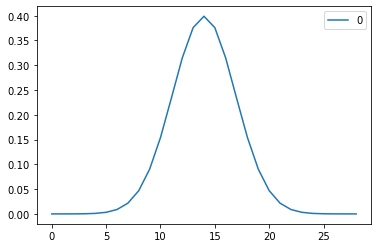

In [496]:
pdf.plot()

In [525]:
from scipy.stats import poisson

#calculate probability
poisson.pmf(k=50, mu=47)

0.051283466650280066

(array([0.06410256, 0.        , 0.06410256, 0.        , 0.        ,
        0.06410256, 0.        , 0.        , 0.        , 0.06410256]),
 array([ 68. ,  71.9,  75.8,  79.7,  83.6,  87.5,  91.4,  95.3,  99.2,
        103.1, 107. ]),
 <BarContainer object of 10 artists>)

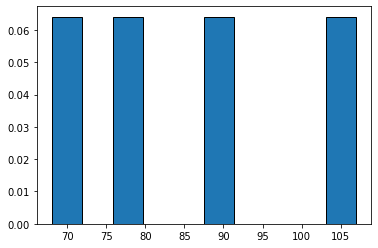

In [523]:
plt.hist(data[19], density=True, edgecolor='black')


In [622]:
stats.poisson.ppf(0, 2.67, loc=0)



-1.0

In [ ]:
import math
import pandas as pd
import scipy.stats as stats
import numpy as np

def sample_mean_ci(sample, ci):

    t_critical = stats.t.ppf(q = ci, df = sample_size-1) 
    sample_stdev = sample.std()
    
    standard_error = sample_stdev/math.sqrt(sample_size)
    margin_of_error = t_critical * standard_error
        
    rate_min = sample_mean - margin_of_error
    rate_max = sample_mean + margin_of_error

    print(rate_min, rate_max)

In [ ]:
from scipy import stats

def ci_sample_mean(sample):
    
    d = stats.norm(*stats.norm.fit(sample))

    sample = np.array(sample)
    sample_mean = sample.mean()
    sample_stdev = sample.std()
    sample_size = len(sample)

    mean_std = sample_stdev/math.sqrt(sample_size)

    d2 = stats.norm(sample_mean, mean_std).interval(0.95)

    return d2

    # What is the difference between ci of population and ci for mean of pop

